In [65]:
import numpy as np
import os
import pandas as pd
import ast

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import transforms
from tqdm import tqdm

In [66]:
tqdm.pandas()

In [2]:
%matplotlib inline

In [3]:
path = "../data/processed/mediapipe/tamires/"

In [4]:
def get_all_files(data_path):
    files_path_list = []
    for path, subdirs, files in os.walk(data_path):
        for name in files:
            if name.endswith(".csv"):
                files_path_list.append(os.path.join(path, name))
    return files_path_list

In [5]:
def plot_x_y(img_x,img_y):
    base = plt.gca().transData
    rot = transforms.Affine2D().rotate_deg(180)
    plt.plot(img_x,img_y, 'o',transform= rot + base)
    plt.show()

In [6]:
def plot_img(img_x, img_y, img_z):
    fig = plt.figure()
    hdl = plt.scatter(img_x,img_y,c=img_z,marker='o',cmap=cm.Greys_r)
    ax = plt.gca()

In [8]:
def get_x_y_z_data(data):
    img_data_x = []
    img_data_y = []
    img_data_z = []
    for _img in data:
        img_data_x.append(_img[0])
        img_data_y.append(_img[1])
        img_data_z.append(_img[-1])
    return img_data_x, img_data_y, img_data_z

### Plotting landmarks

In [13]:
img_data_x, img_data_y, img_data_z = get_x_y_z_data(img_data)

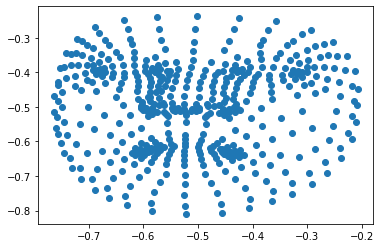

In [14]:
plot_x_y(img_data_x, img_data_y)

### Montando a base de dados

In [26]:
df_mediapipe = pd.read_csv("../data/processed/mediapipe/tamires/mediapipe_outpu.csv", sep=";")

In [28]:
df_mediapipe.drop(columns=df_mediapipe.columns[:-1], inplace=True)

In [31]:
df_mediapipe.head()

,keys
0,"[[0.5292638540267944, 0.5474205613136292, -0.1..."
1,"[[0.5315911769866943, 0.5401287078857422, -0.1..."
2,"[[0.5333443284034729, 0.539849579334259, -0.10..."
3,"[[0.5353459119796753, 0.5288479328155518, -0.1..."
4,"[[0.5324916243553162, 0.5147410035133362, -0.1..."


In [37]:
ast.literal_eval(df_mediapipe.iloc[0]['keys'])[:3]

[[0.5292638540267944, 0.5474205613136292, -0.10548242926597595],
 [0.5351757407188416, 0.45637935400009155, -0.13235028088092804],
 [0.5294479131698608, 0.49369749426841736, -0.08396734297275543]]

In [38]:
ast.literal_eval(df_mediapipe.iloc[0]['keys'])[0][:-1]

[0.5292638540267944, 0.5474205613136292]

In [10]:
df_mediapipe_x = pd.read_csv("../data/processed/mediapipe/tamires/landmarks_x.csv", sep=";") 

In [13]:
df_mediapipe_x.drop(columns=["Unnamed: 0"], inplace=True)

In [15]:
df_mediapipe_x.to_csv("../data/processed/mediapipe/tamires/landmarks_x.csv", sep=";", index=False)

In [16]:
df_mediapipe_y = pd.read_csv("../data/processed/mediapipe/tamires/landmarks_y.csv", sep=";") 

In [17]:
df_mediapipe_y.drop(columns=["Unnamed: 0"], inplace=True)

In [18]:
df_mediapipe_y.to_csv("../data/processed/mediapipe/tamires/landmarks_y.csv", sep=";", index=False)

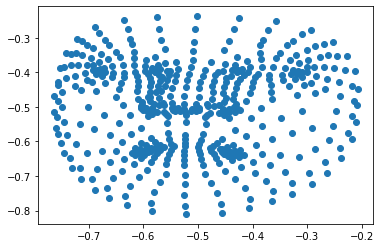

In [20]:
plot_x_y(df_mediapipe_x.iloc[1], df_mediapipe_y.iloc[2])

In [39]:
def make_dfs_xy(df_all):
    imgs_x, imgs_y = [], []
    count = 0
    img_data_test_x, img_data_test_y  = [], []
    
    for index, row in df_all.iterrows():
        dt_img = ast.literal_eval(row["keys"])
        _img_data_test_x, _img_data_test_y, _ = get_x_y_z_data(dt_img)
        img_data_test_x.append(_img_data_test_x)
        img_data_test_y.append(_img_data_test_y)
        
    df_x, df_y = pd.DataFrame(img_data_test_x), pd.DataFrame(img_data_test_y)
    return df_x, df_y

In [106]:
def make_df_xy(df_all):
    imgs_xy = {}
    imgs_xy["landmarks"] = []

    for index, row in tqdm(df_all.iterrows(), total=df_all.shape[0]):
        dt_img = ast.literal_eval(row["keys"])
        img_xy = list(map(lambda x: x[:-1], dt_img))
        imgs_xy["landmarks"].append(img_xy)
    print("Making the DF")
    return pd.DataFrame(imgs_xy)

In [108]:
df_mediapipe_xy = make_df_xy(df_mediapipe)

100%|██████████| 7633/7633 [00:48<00:00, 156.50it/s]

Making the DF


In [110]:
df_mediapipe_xy

,landmarks
0,"[[0.5292638540267944, 0.5474205613136292], [0...."
1,"[[0.5315911769866943, 0.5401287078857422], [0...."
2,"[[0.5333443284034729, 0.539849579334259], [0.5..."
3,"[[0.5353459119796753, 0.5288479328155518], [0...."
4,"[[0.5324916243553162, 0.5147410035133362], [0...."
...,...
7628,"[[0.5737630128860474, 0.6623990535736084], [0...."
7629,"[[0.5724690556526184, 0.6628440022468567], [0...."
7630,"[[0.566924512386322, 0.6609828472137451], [0.5..."
7631,"[[0.5541202425956726, 0.6512662768363953], [0...."


In [111]:
df_mediapipe_xy.to_csv("../data/processed/mediapipe/tamires/landmarks_xy.csv", sep=";", index=False)

In [43]:
len(df_x)

7633

In [48]:
df_xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7633 entries, 0 to 7632
Columns: 467 entries, 0 to 466
dtypes: object(467)
memory usage: 27.2+ MB


In [51]:
df_xy.iloc[0][0]

[0.5292638540267944, 0.5474205613136292, -0.10548242926597595]

In [44]:
df_y

,0,1,2,3,4,5,6,7,8,9,...,458,459,460,461,462,463,464,465,466,467
0,0.581183,0.490754,0.524557,0.427026,0.467563,0.441752,0.385505,0.403794,0.338957,0.312292,...,0.502626,0.494316,0.520105,0.503554,0.511808,0.390863,0.395385,0.396514,0.390187,0.379905
1,0.581183,0.490754,0.524557,0.427026,0.467563,0.441752,0.385505,0.403794,0.338957,0.312292,...,0.502626,0.494316,0.520105,0.503554,0.511808,0.390863,0.395385,0.396514,0.390187,0.379905
2,0.581183,0.490754,0.524557,0.427026,0.467563,0.441752,0.385505,0.403794,0.338957,0.312292,...,0.502626,0.494316,0.520105,0.503554,0.511808,0.390863,0.395385,0.396514,0.390187,0.379905
3,0.581183,0.490754,0.524557,0.427026,0.467563,0.441752,0.385505,0.403794,0.338957,0.312292,...,0.502626,0.494316,0.520105,0.503554,0.511808,0.390863,0.395385,0.396514,0.390187,0.379905
4,0.581183,0.490754,0.524557,0.427026,0.467563,0.441752,0.385505,0.403794,0.338957,0.312292,...,0.502626,0.494316,0.520105,0.503554,0.511808,0.390863,0.395385,0.396514,0.390187,0.379905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7628,0.581183,0.490754,0.524557,0.427026,0.467563,0.441752,0.385505,0.403794,0.338957,0.312292,...,0.502626,0.494316,0.520105,0.503554,0.511808,0.390863,0.395385,0.396514,0.390187,0.379905
7629,0.581183,0.490754,0.524557,0.427026,0.467563,0.441752,0.385505,0.403794,0.338957,0.312292,...,0.502626,0.494316,0.520105,0.503554,0.511808,0.390863,0.395385,0.396514,0.390187,0.379905
7630,0.581183,0.490754,0.524557,0.427026,0.467563,0.441752,0.385505,0.403794,0.338957,0.312292,...,0.502626,0.494316,0.520105,0.503554,0.511808,0.390863,0.395385,0.396514,0.390187,0.379905
7631,0.581183,0.490754,0.524557,0.427026,0.467563,0.441752,0.385505,0.403794,0.338957,0.312292,...,0.502626,0.494316,0.520105,0.503554,0.511808,0.390863,0.395385,0.396514,0.390187,0.379905


## Reduzindo a dimensão dos dados de 368 para 68

In [31]:
import cv2

from sklearn.decomposition import PCA
from scipy.stats import stats

In [38]:
pca_x = PCA(n_components=68)

In [57]:
pca_x.fit(df_x)

/home/manoel/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:555: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


PCA(n_components=68)

In [58]:
df_img_x_pca = pca_x.transform(df_x)

In [61]:
len(df_img_x_pca)

7633

In [63]:
df_img_x_pca = pd.DataFrame(df_img_x_pca)

In [64]:
df_img_x_pca

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
pca_y = PCA(n_components=68)

In [66]:
pca_y.fit(df_y)

/home/manoel/miniconda3/lib/python3.8/site-packages/sklearn/decomposition/_pca.py:555: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


PCA(n_components=68)

In [67]:
img_y_pca = pca_y.transform(df_y)

In [68]:
df_img_y_pca = pd.DataFrame(data = img_y_pca)

In [69]:
df_img_y_pca

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


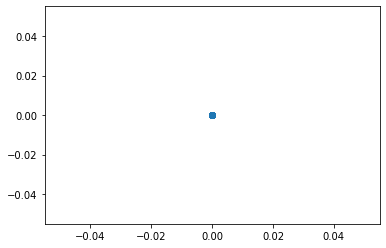

In [70]:
plot_x_y(df_img_x_pca.values[0], df_img_y_pca.values[0])

### K-Means

In [75]:
from sklearn.cluster import KMeans

In [76]:
kmeans_x = KMeans(n_clusters=68, random_state=0).fit(df_x)

<ipython-input-76-e3398ffdeed9>:1: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (68). Possibly due to duplicate points in X.
  kmeans_x = KMeans(n_clusters=68, random_state=0).fit(df_x)


In [81]:
len(kmeans_x.cluster_centers_[0]), len(kmeans_x.cluster_centers_)

(468, 68)

In [80]:
len(df_x)

7633

In [82]:
df_kmeans_x = pd.DataFrame(kmeans_x.transform(df_x))

In [83]:
df_kmeans_x

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
kmeans_y = KMeans(n_clusters=68, random_state=0).fit(df_y)

<ipython-input-84-c89184c8e869>:1: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (68). Possibly due to duplicate points in X.
  kmeans_y = KMeans(n_clusters=68, random_state=0).fit(df_y)


In [85]:
df_kmeans_y = pd.DataFrame(kmeans_x.transform(df_y))

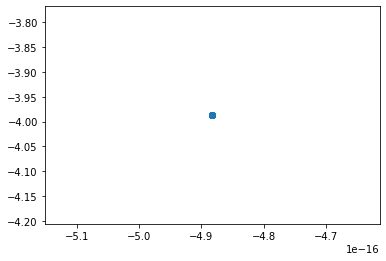

In [86]:
plot_x_y(df_kmeans_x.iloc[0], df_kmeans_y.iloc[0])